In [1]:
from itertools import combinations

import pandas as pd
import numpy as np
import scipy.sparse as sp
from scipy.sparse import coo_matrix
from lightfm import LightFM
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
import numpy as np
from kmodes.kmodes import KModes

In [3]:
date_cols = ['expiration_date', 'registration_init_time']

train_data = pd.read_csv('music_data_raw/train_data_updated.csv', parse_dates=date_cols)
test_data = pd.read_csv('music_data_raw/test_data_updated.csv', parse_dates=date_cols)
all_data = pd.concat([train_data, test_data])
all_data[:3]

,Unnamed: 0,msno,song_id,source_screen_name,source_system_tab,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_time,expiration_date,time
0,0,9176,86884,7,1,7,1.0,206471.0,307,3784,16653,26024,9,0,0,2,2,2012-01-02,2017-10-05,0.000000e+00
1,1,19273,260594,8,3,4,1.0,284584.0,97,36867,74276,26024,9,11,24,0,3,2011-05-25,2017-09-11,1.006623e-07
2,2,19273,140755,8,3,4,1.0,225396.0,97,24601,51540,26024,9,11,24,0,3,2011-05-25,2017-09-11,2.013246e-07


In [15]:
print(all_data.shape)
print(np.count_nonzero(all_data['target'])/all_data.shape[0])

(9934208, 20)
0.6312980360387058


In [18]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556790 entries, 0 to 2556789
Data columns (total 20 columns):
Unnamed: 0                int64
msno                      int64
song_id                   int64
source_screen_name        int64
source_system_tab         int64
source_type               int64
target                    float64
song_length               float64
genre_ids                 int64
artist_name               int64
composer                  int64
lyricist                  int64
language                  int64
city                      int64
bd                        int64
gender                    int64
registered_via            int64
registration_init_time    datetime64[ns]
expiration_date           datetime64[ns]
time                      float64
dtypes: datetime64[ns](2), float64(3), int64(15)
memory usage: 390.1 MB


In [4]:
catCols = ['msno', 'song_id', 'source_screen_name', 'source_system_tab', 'source_type', 'genre_ids', 'artist_name', 
           'composer', 'lyricist', 'language', 'city', 'gender', 'registered_via']
numCols = ['bd', 'song_length']

(0, 100)

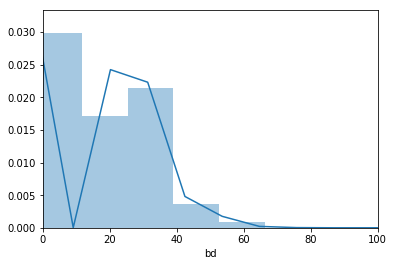

In [9]:
vis1 = sns.distplot(test_data["bd"], bins = 80)
plt.xlim(0, 100)

# Clustering

In [3]:
train_X = pd.read_csv('new_data/new_train_X.csv')
val_X = pd.read_csv('new_data/new_valid_X.csv')
train_y = pd.read_csv('new_data/new_train_y.csv')
val_y = pd.read_csv('new_data/new_valid_y.csv')
test_X = pd.read_csv('new_data/new_test_X.csv')
test_y = pd.read_csv('new_data/new_test_y.csv')


In [4]:
train_X_all = pd.concat([train_X, val_X,test_X])
print(train_X_all.shape,train_X.shape,val_X.shape,test_X.shape)

(734240, 20) (550680, 20) (91780, 20) (91780, 20)


In [5]:
train_X_all.head()

,Unnamed: 0,Unnamed: 0.1,msno,song_id,source_screen_name,source_system_tab,source_type,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,time,registration_init_time_int,expiration_date_int
0,2971195,4410275,19953,290929,4,0,7,227631.0,548,7701,29509,11455,6,0,0,2,2,0.443948,5671,6482
1,543856,3016976,1574,234767,3,0,7,226069.0,371,2742,5696,26024,9,13,36,0,0,0.303696,4732,6532
2,3077911,1936206,5432,90102,18,7,7,246256.0,371,20609,20790,6777,9,2,22,1,0,0.194903,5519,6480
3,1160706,4269820,30083,206348,22,0,11,229041.0,364,43437,63250,26024,2,0,0,2,2,0.429810,5997,6319
4,1796776,526083,9703,161841,16,6,8,312450.0,371,44848,29258,9600,2,20,36,1,3,0.052957,4577,6486


In [6]:
train_X_all.nunique()

Unnamed: 0                    692025
Unnamed: 0.1                  734240
msno                            3076
song_id                       113750
source_screen_name                20
source_system_tab                  9
source_type                       13
song_length                    29434
genre_ids                        367
artist_name                    16066
composer                       29737
lyricist                       15467
language                          11
city                              20
bd                                55
gender                             3
registered_via                     5
time                          734240
registration_init_time_int      1592
expiration_date_int              639
dtype: int64

In [5]:
song_features = ['song_id','genre_ids', 'artist_name', 'composer', 'lyricist','language']
#user_features = ['msno','city', 'gender', 'registered_via']
ui_features = ['source_screen_name', 'source_system_tab', 'source_type']
cat_features = ['song_id','genre_ids', 'artist_name', 'composer', 'lyricist','language','msno','city', 'gender', 'registered_via',
               'source_screen_name', 'source_system_tab', 'source_type']

In [6]:
song_df = train_X_all[song_features].copy()
song_df.head()

,song_id,genre_ids,artist_name,composer,lyricist,language
0,290929,548,7701,29509,11455,6
1,234767,371,2742,5696,26024,9
2,90102,371,20609,20790,6777,9
3,206348,364,43437,63250,26024,2
4,161841,371,44848,29258,9600,2


In [9]:
ui_df = train_X_all[ui_features].copy()
ui_df.head()

,source_screen_name,source_system_tab,source_type
0,4,0,7
1,3,0,7
2,18,7,7
3,22,0,11
4,16,6,8


In [10]:
km = KModes(n_clusters=5, init='Huang', n_init=5, verbose=1)
ui_clusters = km.fit_predict(ui_df)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 37497, cost: 488686.0
Run 1, iteration: 2/100, moves: 18865, cost: 488686.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 44748, cost: 431597.0
Run 2, iteration: 2/100, moves: 0, cost: 431597.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 66265, cost: 611110.0
Run 3, iteration: 2/100, moves: 4406, cost: 611110.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 69030, cost: 607338.0
Run 4, iteration: 2/100, moves: 22955, cost: 607338.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 47625, cost: 581660.0
Run 5, iteration: 2/100, moves: 811, cost: 581660.0
Best run was number 2


In [11]:
print(km.cluster_centroids_)

[[ 8  3  3]
 [16  6  8]
 [11  0  7]
 [17  7  9]
 [ 8  3  4]]


In [12]:
ui_clusters.shape

(734240,)

In [13]:
train_X_all['ui_cluster']=ui_clusters

In [14]:
uic = pd.DataFrame(ui_clusters)

In [15]:
uic.columns=['ui_cluster']

In [16]:
train_X_all.head()

,Unnamed: 0,Unnamed: 0.1,msno,song_id,source_screen_name,source_system_tab,source_type,song_length,genre_ids,artist_name,...,lyricist,language,city,bd,gender,registered_via,time,registration_init_time_int,expiration_date_int,ui_cluster
0,2971195,4410275,19953,290929,4,0,7,227631.0,548,7701,...,11455,6,0,0,2,2,0.443948,5671,6482,2
1,543856,3016976,1574,234767,3,0,7,226069.0,371,2742,...,26024,9,13,36,0,0,0.303696,4732,6532,2
2,3077911,1936206,5432,90102,18,7,7,246256.0,371,20609,...,6777,9,2,22,1,0,0.194903,5519,6480,2
3,1160706,4269820,30083,206348,22,0,11,229041.0,364,43437,...,26024,2,0,0,2,2,0.429810,5997,6319,2
4,1796776,526083,9703,161841,16,6,8,312450.0,371,44848,...,9600,2,20,36,1,3,0.052957,4577,6486,1


In [ ]:
uic.to_csv('new_data/all_uic.csv',index=False)

In [7]:
km2 = KModes(n_clusters=200, init='Huang', n_init=2, verbose=1)
song_clusters = km2.fit_predict(song_df)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 112275, cost: 2017414.0
Run 1, iteration: 2/100, moves: 11125, cost: 2012320.0
Run 1, iteration: 3/100, moves: 235, cost: 2012300.0
Run 1, iteration: 4/100, moves: 0, cost: 2012300.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 86626, cost: 2014213.0
Run 2, iteration: 2/100, moves: 12600, cost: 2003796.0
Run 2, iteration: 3/100, moves: 1106, cost: 2003796.0
Best run was number 2


In [8]:
train_X_all['song_cluster']=song_clusters

In [9]:
songc = pd.DataFrame(song_clusters)
songc.columns=['songc_cluster']
songc.head()

,songc_cluster
0,6
1,12
2,12
3,5
4,2


In [10]:
songc.to_csv('new_data/all_songc.csv',index=False)

# make new data with clustering

In [14]:
uic=pd.read_csv('new_data/all_uic.csv')

In [15]:
uic.head()

,ui_cluster
0,2
1,2
2,2
3,2
4,1


In [17]:
train_X_all['ui_cluster']=uic['ui_cluster'].values

In [18]:
train_X_all.head()

,Unnamed: 0,Unnamed: 0.1,msno,song_id,source_screen_name,source_system_tab,source_type,song_length,genre_ids,artist_name,...,language,city,bd,gender,registered_via,time,registration_init_time_int,expiration_date_int,song_cluster,ui_cluster
0,2971195,4410275,19953,290929,4,0,7,227631.0,548,7701,...,6,0,0,2,2,0.443948,5671,6482,6,2
1,543856,3016976,1574,234767,3,0,7,226069.0,371,2742,...,9,13,36,0,0,0.303696,4732,6532,12,2
2,3077911,1936206,5432,90102,18,7,7,246256.0,371,20609,...,9,2,22,1,0,0.194903,5519,6480,12,2
3,1160706,4269820,30083,206348,22,0,11,229041.0,364,43437,...,2,0,0,2,2,0.429810,5997,6319,5,2
4,1796776,526083,9703,161841,16,6,8,312450.0,371,44848,...,2,20,36,1,3,0.052957,4577,6486,2,1


In [12]:
print(train_X_all.shape,train_X.shape,val_X.shape,test_X.shape)

(734240, 21) (550680, 20) (91780, 20) (91780, 20)


In [19]:
train_X_c = train_X_all[:550680]
val_X_c = train_X_all[550680:550680+91780]
test_X_c = train_X_all[550680+91780:]

In [20]:
print(train_X_all.shape,train_X_c.shape,val_X_c.shape,test_X_c.shape)

(734240, 22) (550680, 22) (91780, 22) (91780, 22)


In [22]:
train_X_c.to_csv('new_data/cluster_train_X.csv',index=False)
val_X_c.to_csv('new_data/cluster_valid_X.csv',index=False)
test_X_c.to_csv('new_data/cluster_test_X.csv',index=False)